In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
train_data = pd.read_csv("/content/drive/MyDrive/data/train.csv/train.csv")

In [5]:
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
train_data.shape

(20800, 5)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.shape

(18285, 5)

In [10]:
train_data.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [11]:
X_train = train_data.drop(['label'], axis = 1)
X_train

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [64]:
y_train = train_data['label']
y_train

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [15]:
y_train.value_counts()

label
0    10361
1     7924
Name: count, dtype: int64

In [13]:
import re
import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
X_train.reset_index(inplace = True)

In [31]:
from nltk.stem.porter import PorterStemmer

def stemming(text_series):
    ps = PorterStemmer()
    corpus = []
    for i in range(len(text_series)):
        if i % 500 == 0:
            print(f"Stemming done for {i} news titles and text.")

        text = text_series.iloc[i].lower()
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.split()

        text = [ps.stem(token) for token in text if token not in stopwords.words('english')]
        text = ' '.join(text)
        corpus.append(text)

    return corpus

In [32]:
target_text = X_train['title'] + " " + X_train['text']
target_text[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House In

In [33]:
corpus = stemming(target_text)
corpus[:20]

Stemming done for 0 news titles and text.
Stemming done for 500 news titles and text.
Stemming done for 1000 news titles and text.
Stemming done for 1500 news titles and text.
Stemming done for 2000 news titles and text.
Stemming done for 2500 news titles and text.
Stemming done for 3000 news titles and text.
Stemming done for 3500 news titles and text.
Stemming done for 4000 news titles and text.
Stemming done for 4500 news titles and text.
Stemming done for 5000 news titles and text.
Stemming done for 5500 news titles and text.
Stemming done for 6000 news titles and text.
Stemming done for 6500 news titles and text.
Stemming done for 7000 news titles and text.
Stemming done for 7500 news titles and text.
Stemming done for 8000 news titles and text.
Stemming done for 8500 news titles and text.
Stemming done for 9000 news titles and text.
Stemming done for 9500 news titles and text.
Stemming done for 10000 news titles and text.
Stemming done for 10500 news titles and text.
Stemming don

['hous dem aid even see comey letter jason chaffetz tweet hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know an

In [34]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [35]:
vocab_size = 20000

In [36]:
one_hot_rep = [one_hot(word, vocab_size) for word in corpus]
one_hot_rep[:20]

[[554,
  2219,
  820,
  13472,
  3636,
  17690,
  4923,
  15932,
  12973,
  10336,
  554,
  2219,
  820,
  13472,
  3636,
  17690,
  4923,
  15932,
  12973,
  10336,
  18162,
  19134,
  6761,
  5010,
  15932,
  12973,
  17011,
  12956,
  19659,
  13868,
  10585,
  3306,
  14617,
  17280,
  17792,
  1156,
  2261,
  3885,
  167,
  19262,
  7945,
  8489,
  14763,
  14436,
  14601,
  3724,
  239,
  19404,
  7542,
  17690,
  4906,
  554,
  10321,
  820,
  18149,
  8548,
  15025,
  17560,
  16141,
  14763,
  14436,
  18677,
  917,
  17690,
  19828,
  7550,
  4923,
  14819,
  239,
  18149,
  12028,
  13461,
  3038,
  3413,
  4518,
  12028,
  18661,
  18336,
  10321,
  13415,
  19828,
  9073,
  17690,
  19269,
  1401,
  10336,
  17572,
  7625,
  19828,
  18080,
  17560,
  17690,
  18042,
  7625,
  18080,
  10321,
  18336,
  6271,
  554,
  12261,
  12722,
  13529,
  19828,
  5836,
  13775,
  12028,
  12403,
  14964,
  1880,
  3636,
  6565,
  11386,
  15373,
  13900,
  4923,
  15350,
  13529,
  

In [37]:
max_sentence_len = 30
padded_one_hot_rep = pad_sequences(one_hot_rep, maxlen = max_sentence_len, padding = 'pre')
padded_one_hot_rep[:50]

array([[12087,  3516, 12547, ..., 18170, 17320, 17983],
       [19955,  2613, 12204, ...,  9461,  4826,  5550],
       [19817,  2125, 18818, ...,  3516, 10487,  5897],
       ...,
       [16088, 11888,  1880, ..., 14601,  1533, 16088],
       [17044, 12541,  2476, ..., 12040,  2613,  2775],
       [17560,  6949, 18827, ...,  3948, 12169, 17021]], dtype=int32)

In [38]:
padded_one_hot_rep.shape

(18285, 30)

In [65]:
from keras import layers, models

embedding_features = 50

input_layer = layers.Input(shape = (max_sentence_len,), name = 'input_layer')
x = layers.Embedding(vocab_size, output_dim = embedding_features, name = 'embedding_layer')(input_layer)

x = layers.Bidirectional(layers.LSTM(512, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(256))(x)

x = layers.Dropout(0.3)(x)

x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)

output_layer = layers.Dense(1, activation = 'sigmoid', name = 'output_layer')(x)

model = models.Model(inputs = input_layer, outputs = output_layer)


In [66]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 30)]              0         
                                                                 
 embedding_layer (Embedding  (None, 30, 50)            1000000   
 )                                                               
                                                                 
 bidirectional_8 (Bidirecti  (None, 30, 1024)          2306048   
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 512)               2623488   
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                           

In [67]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [68]:
pad_embedd_X_train = np.array(padded_one_hot_rep)
y_train_arr = np.array(y_train)

In [69]:
pad_embedd_X_train.shape

(18285, 30)

In [70]:
y_train_arr.shape

(18285,)

In [71]:
epochs = 20
batch_size = 512

from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(pad_embedd_X_train, y_train_arr, test_size = 0.1, random_state = 42)

history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.1, verbose = 1)

Epoch 1/20
29/29 [==============================] - 16s 294ms/step - loss: 0.4980 - accuracy: 0.7353 - val_loss: 0.3026 - val_accuracy: 0.8736
Epoch 2/20
29/29 [==============================] - 7s 249ms/step - loss: 0.1952 - accuracy: 0.9234 - val_loss: 0.2777 - val_accuracy: 0.8809
Epoch 3/20
29/29 [==============================] - 7s 246ms/step - loss: 0.0939 - accuracy: 0.9676 - val_loss: 0.3619 - val_accuracy: 0.8724
Epoch 4/20
29/29 [==============================] - 6s 195ms/step - loss: 0.0377 - accuracy: 0.9872 - val_loss: 0.3793 - val_accuracy: 0.8657
Epoch 5/20
29/29 [==============================] - 7s 230ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.5633 - val_accuracy: 0.8748
Epoch 6/20
29/29 [==============================] - 5s 184ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.6040 - val_accuracy: 0.8651
Epoch 7/20
29/29 [==============================] - 7s 252ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.6651 - val_accuracy: 0.8639
Epoch

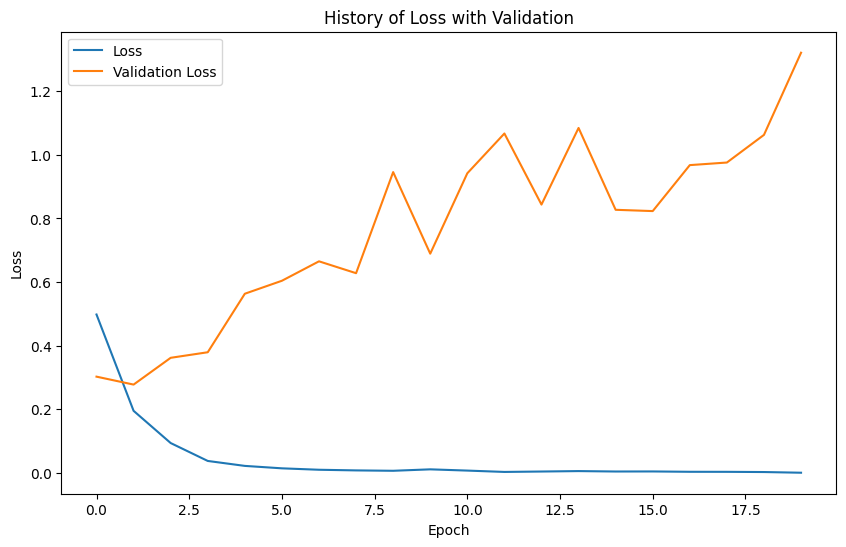

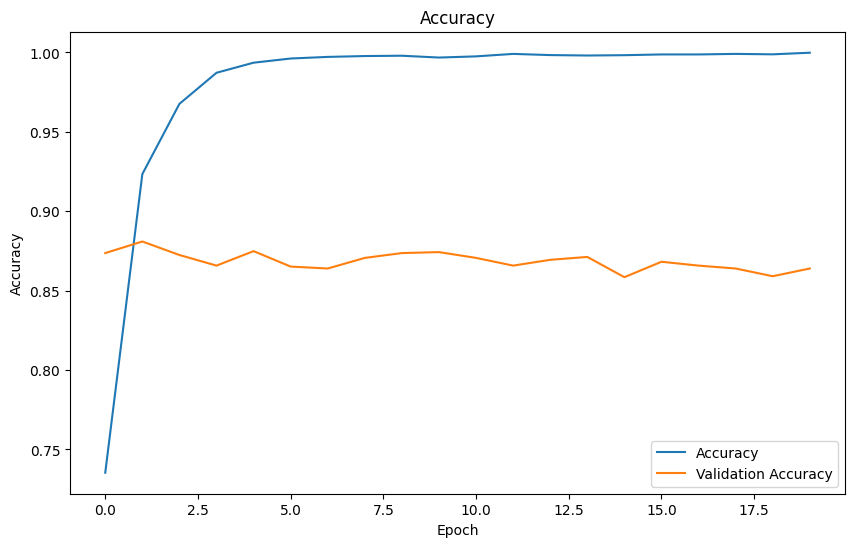

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('History of Loss with Validation')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()


In [74]:
y_pred = model.predict(X_test)

58/58 [==============================] - 2s 8ms/step


In [75]:
model.evaluate(X_test, y_test)

58/58 [==============================] - 0s 8ms/step - loss: 1.4766 - accuracy: 0.8557


[1.4765839576721191, 0.8556588292121887]

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred.round())

print(f"Mean Squared Error = {mse}")
print(f"R2 Score = {r2}")
print(f"Accuracy = {round(accuracy*100, 4)} %")


Mean Squared Error = 0.13571356157338013
R2 Score = 0.44739130223517576
Accuracy = 85.5659 %


In [77]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1036
           1       0.83      0.84      0.83       793

    accuracy                           0.86      1829
   macro avg       0.85      0.85      0.85      1829
weighted avg       0.86      0.86      0.86      1829



In [78]:
model.save("fake-news-lstms.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
import pickle

with open('/content/drive/MyDrive/data/processed_corpus.pkl', 'wb') as f:
    pickle.dump(corpus, f)


In [82]:
test_data = pd.read_csv("/content/drive/MyDrive/data/test.csv/test.csv")
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [83]:
test_data.dropna(inplace = True)
test_data.reset_index(inplace = True)
test_data.shape

(4575, 5)

In [84]:
corpus_test = stemming(test_data['title'] + " " + test_data['text'])
corpus_test[:20]

Stemming done for 0 news titles and text.
Stemming done for 500 news titles and text.
Stemming done for 1000 news titles and text.
Stemming done for 1500 news titles and text.
Stemming done for 2000 news titles and text.
Stemming done for 2500 news titles and text.
Stemming done for 3000 news titles and text.
Stemming done for 3500 news titles and text.
Stemming done for 4000 news titles and text.
Stemming done for 4500 news titles and text.


['specter trump loosen tongu purs string silicon valley new york time palo alto calif year scorn polit process silicon valley leapt fray prospect presid donald j trump push tech commun move beyond tradit role donor embrac new exist agit activist distinguish ventur capit firm emblazon corpor home page earthi epithet one promin tech chieftain say consequ mr trump elect would rang disastr terribl anoth compar dictat nearli tech leader sign open letter decri mr trump campaign anger bigotri quit action peter thiel founder paypal palantir first outsid investor facebook spoke republican convent juli new york time report saturday mr thiel give million support mr trump candidaci even support flee also recent gave million super pac support senat rob portman republican freshman run ohio get involv polit use seen clash silicon valley valu system transform world make problem obsolet solv washington entrepreneur want alien whatev segment custom agre polit retic longer style bunch nerd use lot limeli

In [85]:
import pickle

with open('/content/drive/MyDrive/data/processed_test_corpus.pkl', 'wb') as f:
    pickle.dump(corpus, f)


In [86]:
vocab_size = 20000
one_hot_rep_test = [one_hot(word, vocab_size) for word in corpus_test]

max_sentence_len = 30
padded_one_hot_rep_test = pad_sequences(one_hot_rep_test, maxlen = max_sentence_len, padding = 'pre')
pad_embedd_X_test = np.array(padded_one_hot_rep_test)

y_pred_test = model.predict(pad_embedd_X_test)
test_data['label'] = y_pred_test.round()
test_data.head()


143/143 [==============================] - 1s 9ms/step


,index,id,title,author,text,label
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0.0
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,1.0
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1.0
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1.0
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",0.0


In [87]:
test_data_final = test_data[['id', 'label']]
test_data_final.to_csv('/content/drive/MyDrive/data/my-final.csv', index=False)
